In [1]:
# 1 = car, 0 = goat
A = 1
B = 0
C = 0

In [2]:
import random
import numpy as np
Doors=np.zeros(3)
#Doors = [0,0,0]
index = random.choice([0,1,2])
print(index)
Doors[index] = 1
    
print (Doors)
#del Doors[0] #per eliminare la porta scelta
#print (Doors)

0
[1. 0. 0.]


In [3]:
#giocatore uno: conservative
Choice_1 = random.choice([0,1,2])
print(Choice_1)
#open a door with a goat
if Choice_1 == index:
    print("win")
else:
    print("goat")

0
win


In [4]:
#giocatore due: switcher !!!funziona solo con tre porte
Choice_2_1 = random.choice([0,1,2])
print(Choice_2_1)
if Choice_2_1 == index:
    print("goat") 
else:
    print("win")

2
win


In [5]:
#giocatore tre: newcomer
index_fail = 0
for i in range(3):
    if Doors[i] == 0:
        index_fail = i
        break;
print(index_fail)
Choice_3 = random.choice([index, index_fail ])
print(Choice_3)
if Choice_3 == index:
    print("win")
else:
    print("goat")

1
0
win


In [6]:
#function that simulate the game for the conservative
def first_player(num_doors):
    index = random.randrange(0, num_doors)
    Choice_1 = random.randrange(0, num_doors)
    if Choice_1 == index:
        return 1
    else: 
        return 0

In [7]:
#functiona that simulate the game for the switcher
def second_player(num_doors):
    index = random.randrange(0, num_doors)
    Choice_2 = random.randrange(0, num_doors)
    if Choice_2 == index:
        return 0
    else: 
        return 1

In [8]:
#functiona that simulate the game for the newcomer
def third_player(num_doors):
    #index_fail = 0
    Doors=np.zeros(num_doors)
    index = random.randrange(0, num_doors)
    Doors[index] = 1
    for i in range(num_doors):
        if Doors[i] == 0:
            index_fail = i
            break;
    Choice_3 = random.choice([index,index_fail])
    if Choice_3 == index:
        return 1
    else: 
        return 0

In [9]:
#Tante simulazioni: 0 sconfitta 1 vittoria
n = 1000000 #number of game

#vettore risultati, dopo inserisci matrice
results1=np.zeros(n)
results2=np.zeros(n)
results3=np.zeros(n)

for h in range (n):
    results1[h] = first_player(3) #sto facendo tre porte
    results2[h] = second_player(3)
    results3[h] = third_player(3)

print("Probability of the conservative player " + str(round((np.sum(results1))/n,3)))
print("Probability of the switcher player " + str(round((np.sum(results2))/n,3)))
print("Probability of the newcomer player " + str(round((np.sum(results3))/n,3)))

Probability of the conservative player 0.333
Probability of the switcher player 0.668
Probability of the newcomer player 0.5


In [10]:
#Now I want to implement 100 doors and 98 then will be opened
#The switcher is easy, just to check the doors he chose 

n = 1000000 #number of game

Resu1=np.zeros(n)
Resu2=np.zeros(n)
Resu3=np.zeros(n)

for h in range (n):
    Resu1[h] = first_player(100)
    Resu2[h] = second_player(100)
    Resu3[h] = third_player(100)
    
print("Probability of the conservative player " + str(round((np.sum(Resu1))/n,4)))
print("Probability of the conservative player " + str(round((np.sum(Resu2))/n,4)))
print("Probability of the conservative player " + str(round((np.sum(Resu3))/n,4)))

Probability of the conservative player 0.0098
Probability of the conservative player 0.9899
Probability of the conservative player 0.5008


  0%|          | 0/98 [00:00<?, ?it/s]

[0.33372  0.249892 0.200246 0.16657  0.143167 0.124838 0.111301 0.100277
 0.090732 0.083348 0.077224 0.071186 0.066899 0.062647 0.058653 0.055466
 0.052594 0.05026  0.047669 0.04495  0.04378  0.041419 0.039974 0.038097
 0.037193 0.035681 0.034435 0.033616 0.032486 0.031159 0.03063  0.029619
 0.028538 0.027798 0.027168 0.026121 0.025518 0.024935 0.024534 0.024022
 0.023157 0.022768 0.022138 0.021617 0.021391 0.020705 0.020266 0.019931
 0.019628 0.019484 0.018755 0.018627 0.018237 0.01757  0.017689 0.01708
 0.0168   0.016643 0.016363 0.016206 0.015821 0.015597 0.015351 0.01514
 0.014777 0.014826 0.014297 0.014306 0.013892 0.013878 0.01367  0.013475
 0.013239 0.012883 0.012963 0.012951 0.012746 0.012555 0.012472 0.012358
 0.012088 0.011919 0.011574 0.011693 0.011564 0.011209 0.011352 0.011198
 0.01112  0.010704 0.010792 0.010621 0.010445 0.010563 0.010421 0.010068
 0.009945 0.009954]


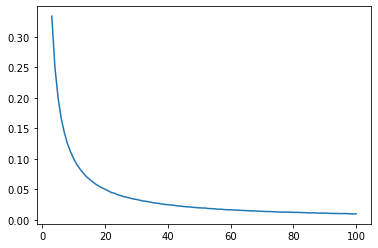

In [12]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from matplotlib import colors

n = 100000 #number of game
N = 100 #maximum number of doors

R1=np.zeros(n)

P1 = np.zeros(N-2) #vettore che contiene le probabilità
j=3
for u in tqdm(range (N-2)):
    for h in range (n):
        R1[h] = first_player(j)
    #print (R1)
    #print(np.sum(R1))
    j = j + 1
    P1[u] = (np.sum(R1))/n
print(P1)
plt.plot(np.arange(3,N+1), P1)
plt.show()

In [13]:
#istogramma per il conservatore
#non cambia nulla l'M porte che vengono aperte dato che lui non cambia mai la sua scelta
M1=np.zeros((98,98))
l=0
k=0
for l in tqdm(range(98)):
    for u in range (N-2):
        if(u>l-1):
            M1[l][u]=P1[u]

print(M1)

  0%|          | 0/98 [00:00<?, ?it/s]

[[0.33372  0.249892 0.200246 ... 0.010068 0.009945 0.009954]
 [0.       0.249892 0.200246 ... 0.010068 0.009945 0.009954]
 [0.       0.       0.200246 ... 0.010068 0.009945 0.009954]
 ...
 [0.       0.       0.       ... 0.010068 0.009945 0.009954]
 [0.       0.       0.       ... 0.       0.009945 0.009954]
 [0.       0.       0.       ... 0.       0.       0.009954]]


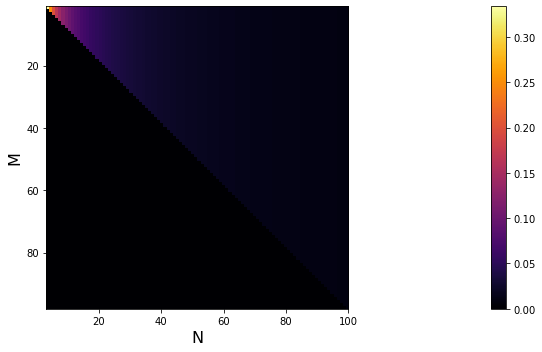

In [14]:
extent=[3,N,N-2,1]
fig=plt.figure(1, figsize=(40,5), tight_layout=True)
plt.imshow(M1, extent=extent, cmap='inferno')
plt.xlabel('N', fontsize=16)
plt.ylabel('M', fontsize=16)
plt.colorbar()

In [19]:
def Second(num_doors, n_open):
    index = random.randrange(0, num_doors)
    Choice_2 = random.randrange(0, num_doors)
    if Choice_2 == index:
        return 0
    else: 
        index_2 = random.randrange(0, (num_doors-n_open-1))
        Choice_2_2 = random.randrange(0, (num_doors-n_open-1)) #the player is making another choice
        if Choice_2_2 == index_2:
            return 1
        else:
            return 0
        

In [55]:
#switcher al variare
n = 10000 #number of game
N = 100 #maximum number of doors
M = N - 2 #maximum numbers of doors that get opened
R2=np.zeros(n)
P2 = np.zeros(N-2) #vettore che contiene le probabilità
M2=np.zeros((N-2,N-2))
j=3
s=1

for e in tqdm(range(N-2)):

    for u in range (N-2):
        for h in range (n):
            R2[h] = Second(j, s)
        #print (R1)
        #print(np.sum(R1))
        j = j + 1
        if(u>s-2): #to avoid case such 6 doors and 7 opened
            M2[e][u] = (np.sum(R2))/n
    #print(M2[e])
    s = s + 1
    j= s+2
    
        
#print(M2)


  0%|          | 0/98 [00:00<?, ?it/s]

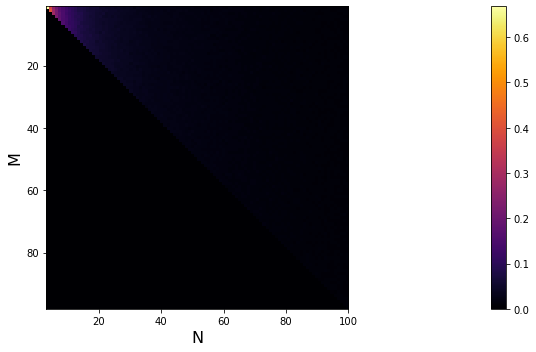

In [56]:
extent=[3,N,N-2,1]
fig=plt.figure(1, figsize=(40,5), tight_layout=True)
plt.imshow(M2, extent=extent, cmap='inferno')
plt.xlabel('N', fontsize=16)
plt.ylabel('M', fontsize=16)
plt.colorbar()